In [2]:
# Import essential libraries
import numpy as np
import json
import os
import pickle
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [5]:
# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "BPEXPRegularModelNotGradientWeighted.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)
with open(file_path, 'r') as f:
    data = json.load(f)
data[0].keys()

dict_keys(['Name', 'Iteration', 'Class', 'Layer', 'TotalDistancesToEachother', 'TotalDistancesAllNeuronsToEachother'])

C:\Users\chris\AppData\Local\Temp\ipykernel_54080\1041244233.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(labels)


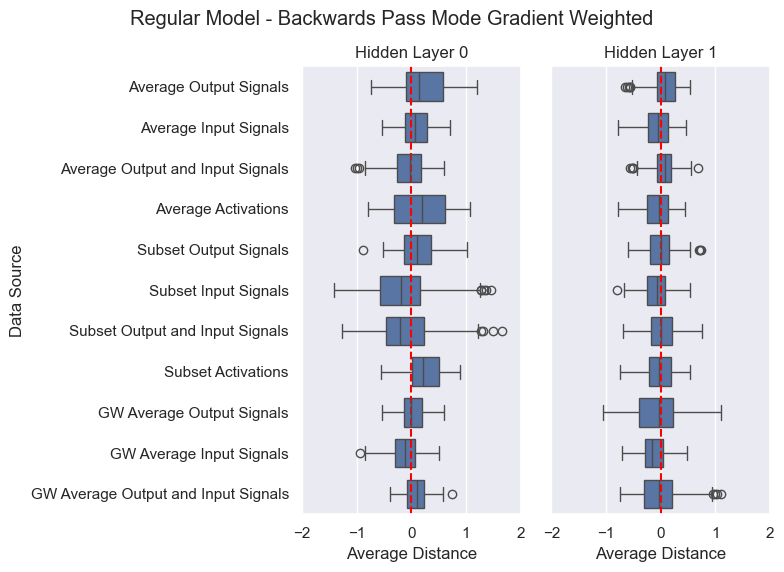

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "BPEXPRegularModelGradientWeighted.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

with open(file_path, 'r') as f:
    data = json.load(f)

# Process data for Layer 0
filtered_data_layer_0 = []
for elem in data:
    average_dist = elem["TotalDistancesAllNeuronsToEachother"]
    elem["TotalDistancesToEachother"] -= average_dist
    if elem["Layer"] == 0:
        filtered_data_layer_0.append(elem)

df_layer_0 = pd.DataFrame(filtered_data_layer_0)

# Process data for Layer 1
filtered_data_layer_1 = []
for elem in data:
    if elem["Layer"] == 1:
        filtered_data_layer_1.append(elem)

df_layer_1 = pd.DataFrame(filtered_data_layer_1)

# Melting the data to prepare for seaborn plotting
df_melted_layer_0 = df_layer_0.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                                   value_vars=["TotalDistancesToEachother"],
                                   var_name="DistanceType", value_name="Distance")

df_melted_layer_1 = df_layer_1.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                                   value_vars=["TotalDistancesToEachother"],
                                   var_name="DistanceType", value_name="Distance")


# Set the figure size
sns.set(rc={"figure.figsize": (8, 6)})

# Set the figure size
fig, axes = plt.subplots(1, 2, sharey=True)


# Boxplot with rotated axes for Layer 0
sns.boxplot(data=df_melted_layer_0, y="Name", x="Distance", hue="DistanceType", orient='h', width=0.7, dodge=True, ax=axes[0])
axes[0].axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
axes[0].set_ylabel("Data Source")
axes[0].set_xlabel("Average Distance")
axes[0].set_title("Hidden Layer 0")
axes[0].legend_.remove()

labels = ['Average Output Signals', 'Average Input Signals', 'Average Output and Input Signals', 'Average Activations', 'Subset Output Signals', 'Subset Input Signals', 'Subset Output and Input Signals', 'Subset Activations', 'GW Average Output Signals', 'GW Average Input Signals', 'GW Average Output and Input Signals']

axes[0].set_yticklabels(labels)

# Boxplot with rotated axes for Layer 1
sns.boxplot(data=df_melted_layer_1, y="Name", x="Distance", hue="DistanceType", orient='h', width=0.7, dodge=True, ax=axes[1])
axes[1].axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
axes[1].set_ylabel("")  # Hide y-axis label to avoid repetition
axes[1].set_xlabel("Average Distance")
axes[1].set_title("Hidden Layer 1")
axes[1].legend_.remove()

x_min, x_max = -2, 2
for ax in axes:
    ax.set_xlim(x_min, x_max)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Regular Model - Backwards Pass Mode Gradient Weighted")
plt.savefig("NL-Regular_GW.png", dpi=300, bbox_inches='tight')
plt.show()

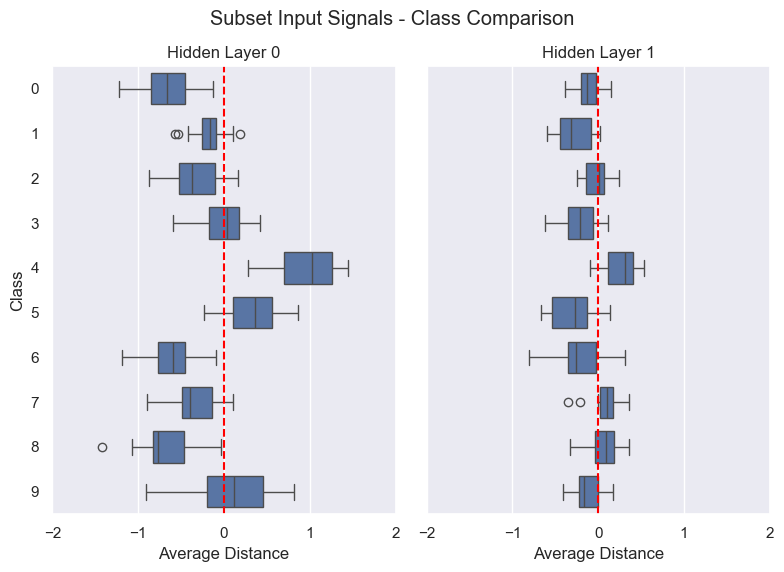

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "BPEXPRegularModelGradientWeighted.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

with open(file_path, 'r') as f:
    data = json.load(f)

# Process data for Layer 0 with specific Name "test"
filtered_data_layer_0 = []
for elem in data:
    if elem["Name"] == "subset_signals_input":
        average_dist = elem["TotalDistancesAllNeuronsToEachother"]
        elem["TotalDistancesToEachother"] -= average_dist
        if elem["Layer"] == 0:
            filtered_data_layer_0.append(elem)
df_layer_0 = pd.DataFrame(filtered_data_layer_0)

# Process data for Layer 1 with specific Name "test"
filtered_data_layer_1 = []
for elem in data:
    if elem["Name"] == "subset_signals_input" and elem["Layer"] == 1:
        filtered_data_layer_1.append(elem)
df_layer_1 = pd.DataFrame(filtered_data_layer_1)

# Melting the data to prepare for seaborn plotting
df_melted_layer_0 = df_layer_0.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                                   value_vars=["TotalDistancesToEachother"],
                                   var_name="DistanceType", value_name="Distance")

df_melted_layer_1 = df_layer_1.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                                   value_vars=["TotalDistancesToEachother"],
                                   var_name="DistanceType", value_name="Distance")

# Set the figure size
sns.set(rc={"figure.figsize": (8, 6)})

# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True)

# Boxplot with rotated axes for Layer 0
sns.boxplot(data=df_melted_layer_0, y="Class", x="Distance", orient='h', width=0.7, dodge=True, ax=axes[0])
axes[0].axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
axes[0].set_ylabel("Class")
axes[0].set_xlabel("Average Distance")
axes[0].set_title("Hidden Layer 0")
#axes[0].legend_.remove()

# Boxplot with rotated axes for Layer 1
sns.boxplot(data=df_melted_layer_1, y="Class", x="Distance", orient='h', width=0.7, dodge=True, ax=axes[1])
axes[1].axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
axes[1].set_ylabel("")  # Hide y-axis label to avoid repetition
axes[1].set_xlabel("Average Distance")
axes[1].set_title("Hidden Layer 1")
#axes[1].legend_.remove()

x_min, x_max = -2, 2
for ax in axes:
    ax.set_xlim(x_min, x_max)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Subset Input Signals - Class Comparison")
plt.savefig("NL-Regular_GW_Subset_Input_Class_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_54080\3572687517.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(labels)


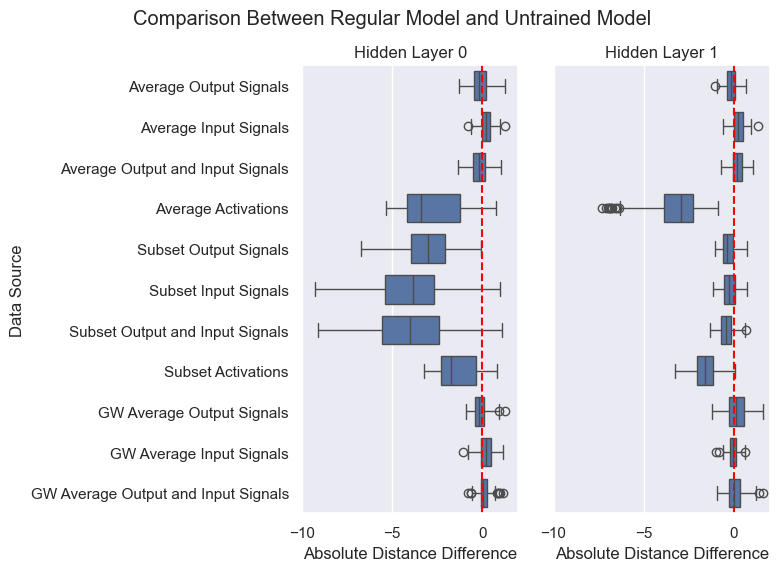

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

# Defining JSON File paths
unity_path = "~/MARKUS/Assets/Experiments/"
file_name_1 = "BPEXPRegularModelGradientWeighted.json"
file_name_2 = "BPEXPUntrainedModelGradientWeighted.json"
file_path_1 = os.path.expanduser(unity_path + file_name_1)
file_path_2 = os.path.expanduser(unity_path + file_name_2)

# Load data from both JSON files
with open(file_path_1, 'r') as f1, open(file_path_2, 'r') as f2:
    data_model_1 = json.load(f1)
    data_model_2 = json.load(f2)

# Process data to calculate absolute differences
def process_and_calculate_differences(data_model_1, data_model_2, layer):
    filtered_data_model_1 = [elem for elem in data_model_1 if elem["Layer"] == layer]
    filtered_data_model_2 = [elem for elem in data_model_2 if elem["Layer"] == layer]
    df_model_1 = pd.DataFrame(filtered_data_model_1)
    df_model_2 = pd.DataFrame(filtered_data_model_2)
    for index in range(len(df_model_1)):
        df_model_1.at[index, "TotalDistancesToEachother"] -= df_model_2.at[index, "TotalDistancesToEachother"]
    return df_model_1

df_diff_layer_0 = process_and_calculate_differences(data_model_1, data_model_2, layer=0)
df_diff_layer_1 = process_and_calculate_differences(data_model_1, data_model_2, layer=1)

# Melting the data to prepare for seaborn plotting
df_melted_diff_layer_0 = df_diff_layer_0.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                                             value_vars=["TotalDistancesToEachother"],
                                             var_name="DistanceType", value_name="Distance")
df_melted_diff_layer_1 = df_diff_layer_1.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                                             value_vars=["TotalDistancesToEachother"],
                                             var_name="DistanceType", value_name="Distance")

# Set the figure size
sns.set(rc={"figure.figsize": (8, 6)})

# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True)

x_min, x_max = -10, 2
for ax in axes:
    ax.set_xlim(x_min, x_max)


# Boxplot with rotated axes for Layer 0
sns.boxplot(data=df_melted_diff_layer_0, y="Name", x="Distance", orient='h', width=0.7, dodge=True, ax=axes[0])
axes[0].axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
axes[0].set_xlabel("Absolute Distance Difference")
axes[0].set_title("Hidden Layer 0")
axes[0].set_ylabel("Data Source")

labels = ['Average Output Signals', 'Average Input Signals', 'Average Output and Input Signals', 'Average Activations', 'Subset Output Signals', 'Subset Input Signals', 'Subset Output and Input Signals', 'Subset Activations', 'GW Average Output Signals', 'GW Average Input Signals', 'GW Average Output and Input Signals']

axes[0].set_yticklabels(labels)

# Boxplot with rotated axes for Layer 1
sns.boxplot(data=df_melted_diff_layer_1, y="Name", x="Distance", orient='h', width=0.7, dodge=True, ax=axes[1])
axes[1].axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
axes[1].set_ylabel("")  # Hide y-axis label to avoid repetition
axes[1].set_xlabel("Absolute Distance Difference")
axes[1].set_title("Hidden Layer 1")




plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Comparison Between Regular Model and Untrained Model")

plt.savefig("Nl-Comparison_GW_Regular_and_GW_Untrained", dpi=300, bbox_inches='tight')
plt.show()


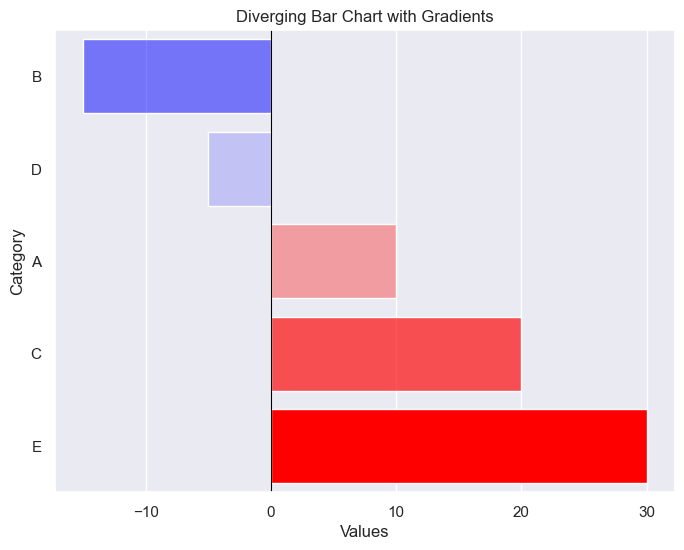

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Category': ['A', 'B', 'C', 'D', 'E'],
        'Values': [10, -15, 20, -5, 30]}
df = pd.DataFrame(data)

# Sort data by Values
df = df.sort_values(by='Values')

# Define colors based on values
colors = df['Values'].apply(lambda x: 'blue' if x < 0 else 'red').tolist()

# Create diverging bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = sns.barplot(x='Values', y='Category', data=df, hue='Category', dodge=False, palette=colors, legend=False)

# Apply gradient
for bar, value in zip(bars.patches, df['Values']):
    if value < 0:
        bar.set_facecolor((0, 0, 1, abs(value)/max(abs(df['Values']))))
    else:
        bar.set_facecolor((1, 0, 0, abs(value)/max(abs(df['Values']))))

# Customizing the plot
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_title('Diverging Bar Chart with Gradients')
ax.set_xlabel('Values')
ax.set_ylabel('Category')
plt.show()


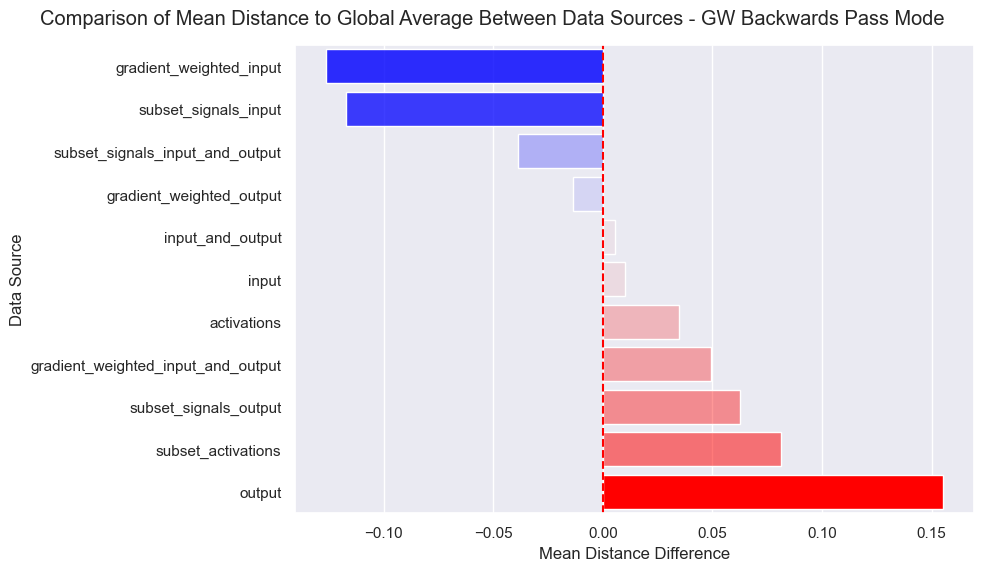

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "BPEXPRegularModelGradientWeighted.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

# Load data from JSON file
with open(file_path, 'r') as f:
    data = json.load(f)

# Process data for both layers
for elem in data:
    average_dist = elem["TotalDistancesAllNeuronsToEachother"]
    elem["TotalDistancesToEachother"] -= average_dist

# Create DataFrame from processed data
df = pd.DataFrame(data)

# Calculate the average TotalDistancesToEachother per Name
df_avg = df.groupby('Name')['TotalDistancesToEachother'].mean().reset_index()

# Sort the DataFrame by the average values
df_avg = df_avg.sort_values(by='TotalDistancesToEachother')

# Melting the data to prepare for seaborn plotting
df_melted = df_avg.melt(id_vars=["Name"], value_vars=["TotalDistancesToEachother"],
                        var_name="DistanceType", value_name="Distance")

# Define colors based on Distance values
colors = df_melted['Distance'].apply(lambda x: 'blue' if x < 0 else 'red').tolist()

# Set the figure size
sns.set(rc={"figure.figsize": (10, 6)})

# Barplot with colors based on values
bars = sns.barplot(data=df_melted, y="Name", x="Distance",hue='Name', dodge=False, palette=colors)

# Apply gradient
for bar, value in zip(bars.patches, df_melted['Distance']):
    if value < 0:
        bar.set_facecolor((0, 0, 1, abs(value)/max(abs(df_melted['Distance']))))
    else:
        bar.set_facecolor((1, 0, 0, abs(value)/max(abs(df_melted['Distance']))))

# Customizing the plot
bars.axvline(x=0, color='red', linestyle='--')  # Add vertical red line at x=0
bars.set_ylabel("Data Source")
bars.set_xlabel("Mean Distance Difference")

labels = ['GW Average Input Signals', 'Subset Input Signals', 'Subset Output and Input Signals', 'GW Average Output Signals', 'Average Output and Input Signals', 'Average Input Signals', 'Average Activations', 'GW Average Output and Input Signals', 'Subset Output Signals', 'Subset Activations', 'Average Output Signals']

#bars.set_yticklabels(labels)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Comparison of Mean Distance to Global Average Between Data Sources - GW Backwards Pass Mode")
#plt.savefig("NL-Data_Source_Bar_Comparison_Not_GW.png", dpi=300, bbox_inches='tight')
plt.show()


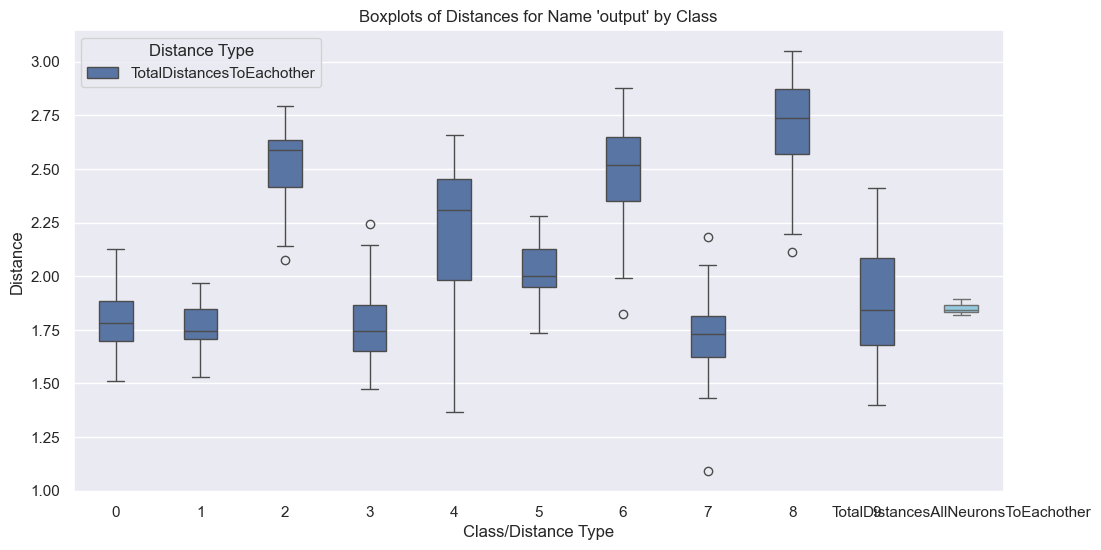

In [70]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "BPEXPRegularModelGradientWeighted.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

with open(file_path, 'r') as f:
    data = json.load(f)

# Filtering data for Layer 0
filtered_data = [elem for elem in data if elem["Layer"] == 0]

# Create a DataFrame from the filtered data
df = pd.DataFrame(filtered_data)

# Melting the data to prepare for seaborn plotting
df_melted = df.melt(id_vars=["Name", "Iteration", "Class", "Layer"],
                    value_vars=["TotalDistancesToEachother", "TotalDistancesAllNeuronsToEachother"],
                    var_name="DistanceType", value_name="Distance")

# Filter data for the specific Name "output"
df_output = df_melted[df_melted["Name"] == "output"]

# Separate the data for plotting
df_to_eachother = df_output[df_output["DistanceType"] == "TotalDistancesToEachother"]
df_all_neurons = df_output[df_output["DistanceType"] == "TotalDistancesAllNeuronsToEachother"]

# Set the figure size
sns.set(rc={"figure.figsize": (12, 6)})

# Create the boxplot
fig, ax = plt.subplots()

# Boxplot for TotalDistancesToEachother by Class
sns.boxplot(data=df_to_eachother, x="Class", y="Distance", ax=ax, hue="DistanceType", width=0.4, dodge=True)

# Boxplot for TotalDistancesAllNeuronsToEachother (all classes have the same value)
sns.boxplot(data=df_all_neurons, x="DistanceType", y="Distance", ax=ax, width=0.4, dodge=False, color='skyblue')

# Customize plot appearance
ax.set_xlabel("Class/Distance Type")
ax.set_ylabel("Distance")
plt.title("Boxplots of Distances for Name 'output' by Class")

plt.legend(title='Distance Type')
plt.show()


In [7]:
data_source= "All"
#data2 = [data[i] for i in range(len(data)) if data[i]["Name"]==data_source]
data2 = data.copy()
for i in range(len(data2)):
    data2[i]["TotalDistancesToEachother"]=data2[i]["TotalDistancesToEachother"][0]
    data2[i]["TotalDistancesAllToEachother"]=data2[i]["TotalDistancesAllToEachother"][0]

In [8]:
df = pd.DataFrame(data2)
df_melt = df.melt(id_vars="Name", value_vars=["TotalDistancesToEachother", "TotalDistancesAllToEachother"], var_name="Type", value_name="Average Distance")

In [5]:
df_melt

,Name,Type,Average Distance
0,output,TotalDistancesToEachother,1.947093
1,output,TotalDistancesToEachother,2.120615
2,output,TotalDistancesToEachother,2.095192
3,output,TotalDistancesToEachother,1.819803
4,output,TotalDistancesToEachother,1.801355
...,...,...,...
3195,subset_activations,TotalDistancesAllToEachother,2.579921
3196,subset_activations,TotalDistancesAllToEachother,2.579921
3197,subset_activations,TotalDistancesAllToEachother,2.579921
3198,subset_activations,TotalDistancesAllToEachother,2.579921


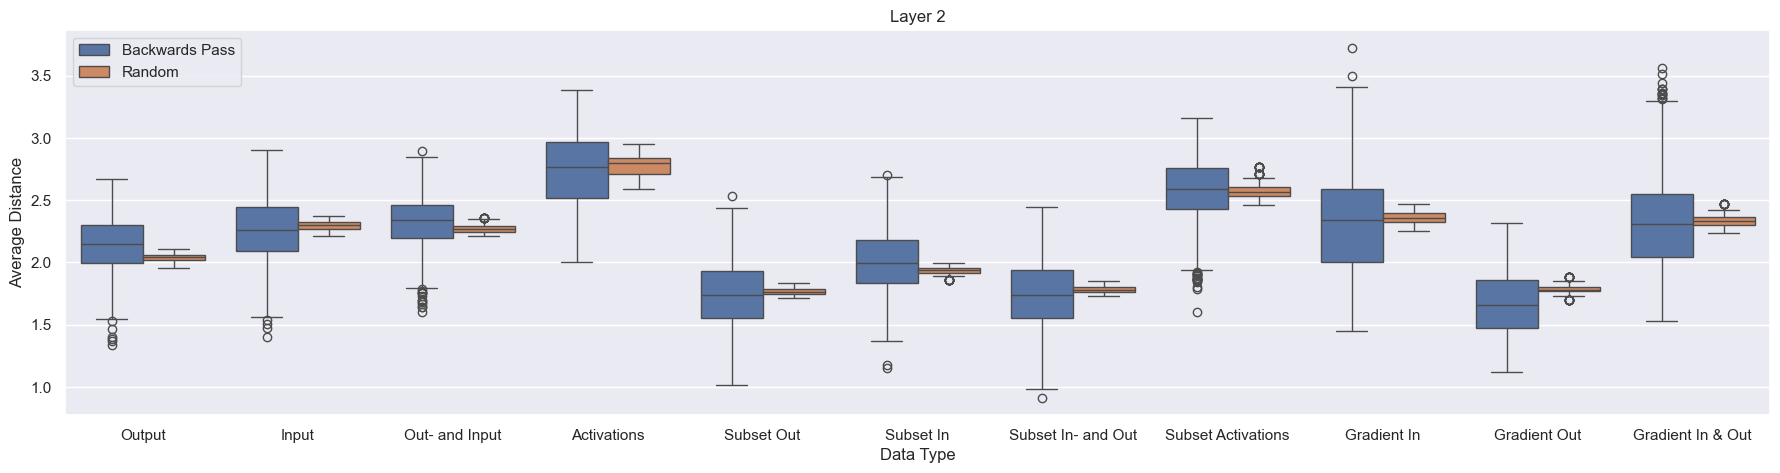

In [9]:
sns.set(rc={"figure.figsize":(22, 5)}) #width=3, #height=4
ax = sns.boxplot(data = df_melt,
                x = 'Name',
                y = 'Average Distance',
            hue = "Type")
ax.set_xlabel('Data Type')
ax.set_ylabel('Average Distance')
#ax.legend(title='Measurement', labels=['Backwards Pass', 'Random'])
handles, labels = ax.get_legend_handles_labels()
idx = np.sort(np.unique(np.array(labels), return_index=True)[1])
ax.legend(np.array(handles)[idx], ["Backwards Pass", "Random"])

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],["Output", "Input", "Out- and Input", "Activations", "Subset Out", "Subset In", "Subset In- and Out", "Subset Activations", "Gradient In", "Gradient Out", "Gradient In & Out"])
plt.title("Layer 2")
plt.show()

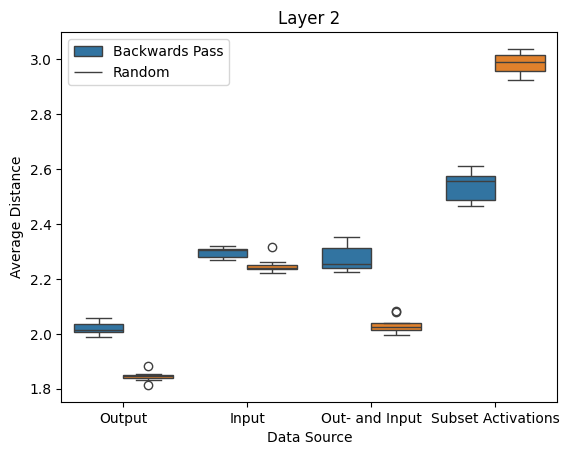

In [120]:
ax = sns.boxplot(data = df_melt,
                x = 'Name',
                y = 'value',
            hue = "column")
ax.set_xlabel('Data Source')
ax.set_ylabel('Average Distance')
#ax.legend(title='Measurement', labels=['Backwards Pass', 'Random'])
plt.legend(labels=['Backwards Pass', 'Random'])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7],["Output", "Input", "Out- and Input", "Subset Activations"])
plt.title("Layer 2")
plt.show()

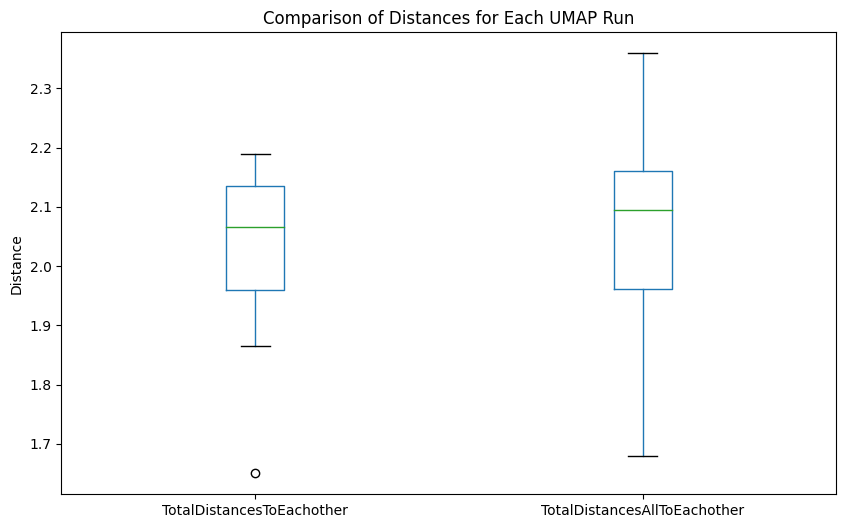

In [27]:
distances_to_eachother = [output[i]["TotalDistancesToEachother"][0] for i in range(len(output))]
distances_all_to_eachother = [output[i]["TotalDistancesAllToEachother"][0] for i in range(len(output))]

# Create a DataFrame
df = pd.DataFrame({
    'TotalDistancesToEachother': distances_to_eachother,
    'TotalDistancesAllToEachother': distances_all_to_eachother
})

# Create side-by-side boxplots
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column=['TotalDistancesToEachother', 'TotalDistancesAllToEachother'], ax=ax, grid=False)
ax.set_ylabel('Distance')
ax.set_title('Comparison of Distances for Each UMAP Run')

# Show the plot
plt.show()

In [39]:
combined_random_dist = [item for sublist in data['RandomDistances'] for item in sublist]

In [53]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def Average(lst):
    return sum(lst) / len(lst)

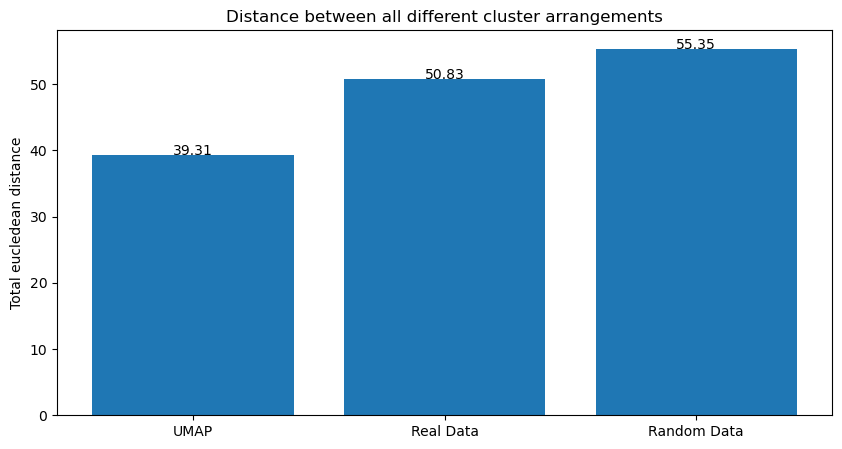

In [56]:
plt.figure(figsize = (10, 5))

name = ["UMAP", "Real Data", "Random Data"]
vals = [round(data["AverageUMAPDistance"],2), round(data["AverageRealDistance"],2), round(Average(data["AverageRandomDistance"]), 2)]


plt.bar(name, vals)
addlabels(name, vals)

plt.title('Distance between all different cluster arrangements')

plt.ylabel('Total eucledean distance')
#plt.xlabel('Data Origin')

plt.show()

/var/folders/_b/s54cb5212b3gmft7v5cqy2p40000gn/T/ipykernel_73828/3368694242.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(names)


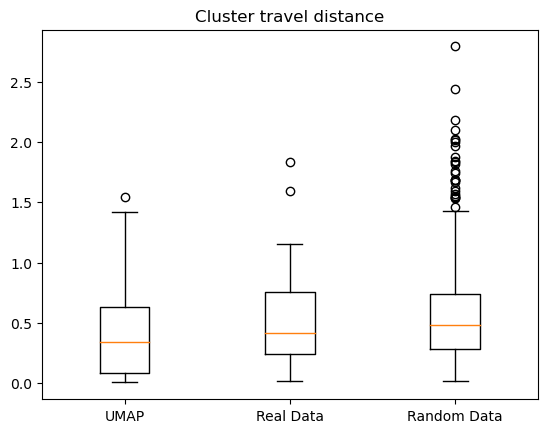

In [40]:
fig1, ax1 = plt.subplots()
names = ["UMAP", "Real Data", "Random Data"]
ax1.set_title('Cluster travel distance')
ax1.set_xticklabels(names)
ax1.boxplot([data["UMAPDistances"], data["RealDistances"], combined_random_dist])

plt.show()

In [57]:
# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "cluster_distances_multiple_umap_runs.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

with open(file_path, 'r') as f:
    data2 = json.load(f)

In [77]:
umap_total_distances = [item["TotalUMAPDistance"] for item in data2]
real_total_distances = [item["TotalRealDistance"] for item in data2]
random_avg_total_distances = [Average(item["TotalRandomDistance"]) for item in data2]

/var/folders/_b/s54cb5212b3gmft7v5cqy2p40000gn/T/ipykernel_73828/2526587363.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(names)


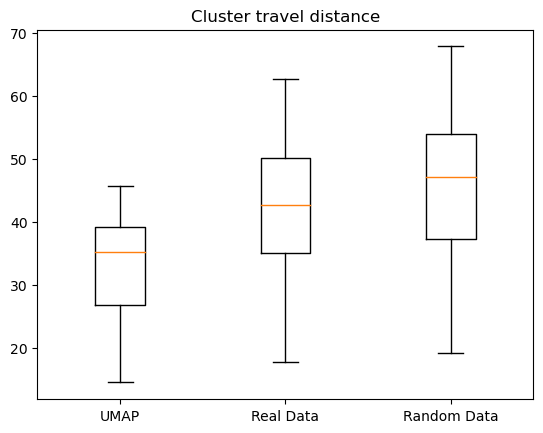

In [88]:
fig2, ax2 = plt.subplots()
names = ["UMAP", "Real Data", "Random Data"]
ax2.set_title('Cluster travel distance')
ax2.set_xticklabels(names)
ax2.boxplot([umap_total_distances, real_total_distances, random_avg_total_distances])

plt.show()

<AxesSubplot:>

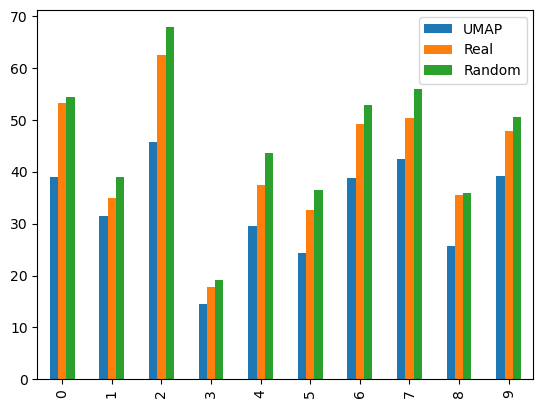

In [91]:
#Add visualization for each UMAP Run
df=pd.DataFrame({'UMAP':umap_total_distances, 'Real':real_total_distances, 'Random':random_avg_total_distances})
df.plot(kind='bar', stacked=False)